<a href="https://colab.research.google.com/github/ADCO02/trabajoPreparacionDatos/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo:** Online Shoppers Purchasing Intention

Preparación de datos

## Introducción

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from imblearn.over_sampling import RandomOverSampler
from imblearn import FunctionSampler
from imblearn.pipeline import Pipeline

from scipy.stats import gaussian_kde

## Carga y explicación de los datos

El conjunto de datos "Online Shoppers Purchasing Intention" recoge información sobre el comportamiento de usuarios que visitan un sitio web de comercio electrónico, con el objetivo de predecir si una sesión finalizará o no con una compra. Cada observación del dataset representa una sesión de usuario, y las variables describen tanto características de la navegación como aspectos temporales y contextuales.

El dataset contiene 12.330 registros y 18 variables, que incluyen atributos numéricos y categóricos. Entre ellas se encuentran métricas relacionadas con el número de páginas visitadas y el tiempo de permanencia en distintos tipos de páginas (administrativas, informativas y de producto), así como variables que recogen información sobre el mes de la visita, el tipo de visitante (nuevo o recurrente), el sistema operativo, el navegador y la región geográfica. La variable objetivo es Revenue, de tipo binaria, que indica si la sesión terminó en una compra (True) o no (False).

Este conjunto de datos es especialmente relevante en el ámbito de la analítica web y el aprendizaje automático, ya que permite estudiar patrones de comportamiento de los usuarios y su relación con la conversión, un aspecto clave en comercio electrónico.

El dataset fue obtenido del UCI Machine Learning Repository, una fuente ampliamente utilizada en investigación y docencia en ciencia de datos y aprendizaje automático.

In [3]:
!wget -O online_shoppers.zip "https://archive.ics.uci.edu/static/public/468/online+shoppers+purchasing+intention+dataset.zip"
!unzip -o online_shoppers.zip
!ls -la

--2026-01-13 15:37:09--  https://archive.ics.uci.edu/static/public/468/online+shoppers+purchasing+intention+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online_shoppers.zip’

online_shoppers.zip     [  <=>               ]   1.02M  2.84MB/s    in 0.4s    

2026-01-13 15:37:10 (2.84 MB/s) - ‘online_shoppers.zip’ saved [1072219]

Archive:  online_shoppers.zip
 extracting: online_shoppers_intention.csv  
total 2112
drwxr-xr-x 1 root root    4096 Jan 13 15:37 .
drwxr-xr-x 1 root root    4096 Jan 13 13:30 ..
drwxr-xr-x 4 root root    4096 Dec 11 14:34 .config
-rwx------ 1 root root 1072063 May 22  2023 online_shoppers_intention.csv
-rw-r--r-- 1 root root 1072219 Jan 13 15:37 online_shoppers.zip
drwxr-xr-x 1 root root    4096 Dec 11 14:34 sample_data


In [4]:
df = pd.read_csv('online_shoppers_intention.csv')
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Tras examinar la estructura del dataset mediante las funciones shape, info() y head(), se observa que el conjunto de datos está correctamente cargado y no presenta valores nulos en ninguna de sus variables, aunque el tratamiento de la calidad de los datos se abordará con mayor detalle en secciones posteriores.

El dataset incluye variables de distinta naturaleza, combinando atributos numéricos, categóricos y booleanos, lo que hace necesario un preprocesado adecuado antes de aplicar modelos de aprendizaje automático. Esta diversidad de tipos permite capturar tanto información cuantitativa del comportamiento de navegación como características contextuales de la sesión.

A partir de las estadísticas descriptivas, se aprecia que varias variables numéricas presentan distribuciones fuertemente asimétricas, con valores máximos muy elevados en comparación con la media. Este comportamiento es especialmente notable en variables como Administrative_Duration, ProductRelated_Duration y PageValues, lo que indica la presencia de sesiones con tiempos de navegación excepcionalmente altos. Además, la mediana igual a cero en muchas variables revela una elevada abundancia de sesiones sin interacción en determinados tipos de páginas, algo habitual en datos de navegación web.

Por último, la variable objetivo Revenue es de tipo booleano e indica si una sesión finaliza o no en compra. Esto confirma que el problema planteado corresponde a un problema de clasificación binaria, en el que se busca predecir la probabilidad de conversión de un usuario a partir de su comportamiento durante la sesión.

## Estudio de Duplicados y Nulos

### Duplicados

Lo primero que haremos es comprobar la existencia de registros duplicados en el conjunto de datos. La presencia de duplicados puede introducir sesgos en el análisis, ya que algunas observaciones podrían estar sobrerrepresentadas, afectando tanto a las métricas descriptivas como al rendimiento de los modelos de clasificación.

En esta sección se analiza si existen sesiones repetidas en el dataset y, en caso afirmativo, se evalúa la conveniencia de su eliminación para garantizar la calidad y la fiabilidad de los resultados obtenidos en etapas posteriores.

In [8]:
dups = df.duplicated()

print("Existencia de duplicados: ", dups.any())

print("Número de instancias duplicadas: ", dups.sum())

df[dups].head()

Existencia de duplicados:  True
Número de instancias duplicadas:  125


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False


Veamos si existen filas duplicadas ignorando la variable objetivo.

In [9]:
dup_all = df.duplicated().sum()
dup_no_target = df.duplicated(subset=[c for c in df.columns if c.lower() != "revenue"]).sum()

print("Duplicados exactos (todas las columnas):", dup_all)
print("Duplicados ignorando target:", dup_no_target)


Duplicados exactos (todas las columnas): 125
Duplicados ignorando target: 125


Se han identificado 125 filas duplicadas exactas, lo que representa aproximadamente un 1 % del total del conjunto de datos. Dado que el dataset no dispone de identificadores únicos y que cada observación corresponde a sesiones de navegación agregadas, la existencia de registros duplicados resulta plausible y no necesariamente indicativa de un problema en la recopilación de los datos.

Asimismo, no se han detectado inconsistencias en la variable objetivo Revenue entre las observaciones duplicadas, lo que refuerza la idea de que estos registros no introducen ruido ni ambigüedad en el problema de clasificación.

Por estos motivos, se decide mantener las filas duplicadas, con el objetivo de preservar la distribución original de los datos y evitar alteraciones artificiales en la representatividad del conjunto.

### Nulos

A continuación se analiza la presencia de valores nulos en el conjunto de datos. La identificación y el tratamiento adecuado de valores faltantes es fundamental para garantizar la consistencia de los datos y evitar problemas en el entrenamiento y evaluación de los modelos.

In [10]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


Tal y como se anticipó en la fase de carga de los datos, el conjunto de datos no presenta valores nulos en ninguna de sus variables. En consecuencia, no es necesario aplicar técnicas de imputación, lo que simplifica el preprocesado y permite trabajar directamente con la información disponible.

## Evaluación de modelos

En esta sección se definen los modelos de aprendizaje automático que se evaluarán a lo largo del trabajo, así como los espacios de búsqueda de hiperparámetros asociados a cada uno de ellos. Asimismo, se introducen algunas funciones auxiliares diseñadas para facilitar la evaluación sistemática y comparativa del rendimiento de los modelos.

Como paso previo a todo el proceso de entrenamiento y validación, se procede en primer lugar a separar el conjunto de datos en variables predictoras (X) y variable objetivo (y), estableciendo así la base para el posterior preprocesado y ajuste de los modelos.

In [ ]:
X = df.drop(columns=["Revenue"])
y = df["Revenue"]

Con el fin de garantizar la reproducibilidad de los resultados, se define un valor fijo de random state que será utilizado de forma consistente en todos los procesos que impliquen aleatoriedad, como la separación de los datos o el entrenamiento de los modelos.

In [14]:
rnd_st = 42

Antes de definir los modelos, se analiza la distribución de la variable objetivo con el fin de identificar posibles problemas de desbalanceo entre clases.

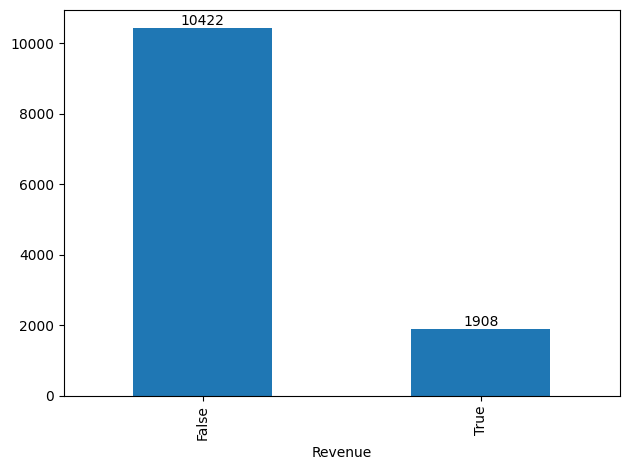

In [15]:
ax = y.value_counts().plot(kind="bar")

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

La distribución de la variable objetivo muestra un claro desbalanceo entre clases, con una mayoría de sesiones que no finalizan en compra frente a un número significativamente menor de conversiones. Para abordar este desbalanceo, en los modelos que lo permiten se utilizará el hiperparámetro class_weight="balanced", de forma que se penalicen adecuadamente los errores en la clase minoritaria. En el caso del modelo KNN, que no dispone de este mecanismo, se aplicará una técnica de oversampling aleatorio (ROS) para equilibrar las clases durante el entrenamiento.

### Logistic Regression

La Regresión Logística se utiliza como uno de los modelos base de referencia, dado su carácter interpretable y su buen rendimiento en problemas de clasificación binaria. Además, permite establecer una primera línea de comparación frente a modelos más complejos.

En la definición del modelo se fija un número elevado de iteraciones máximas (max_iter=2000) para asegurar la convergencia del algoritmo, especialmente en presencia de regularización. Asimismo, se emplea el parámetro class_weight="balanced" con el objetivo de mitigar el desbalanceo de clases, ajustando automáticamente los pesos en función de la frecuencia de cada clase. El uso de un random_state fijo garantiza la reproducibilidad de los resultados.

En cuanto a la búsqueda de hiperparámetros, se evalúan distintos valores del parámetro C, que controla la intensidad de la regularización, permitiendo analizar el compromiso entre sesgo y varianza. Adicionalmente, se incluye el parámetro fit_intercept, con el fin de comprobar si la inclusión del término independiente mejora el rendimiento del modelo en este contexto.

In [16]:
lr = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=rnd_st)

param_grid_lr = {
    "model__C": [0.1, 1, 10],
    "model__fit_intercept": [True, False],
}

### KNN

El modelo K-Nearest Neighbors (KNN) se incluye como un enfoque no paramétrico basado en la similitud entre observaciones, lo que permite capturar relaciones locales en el espacio de características sin asumir una forma funcional previa.

Dado que KNN no dispone del hiperparámetro class_weight, el desbalanceo de clases se aborda mediante una técnica de oversampling aleatorio, utilizando RandomOverSampler, aplicada únicamente sobre el conjunto de entrenamiento. De este modo, se busca equilibrar la representación de las clases sin alterar el conjunto de validación o prueba. El uso de un random_state fijo en el proceso de oversampling garantiza la reproducibilidad.

En cuanto a la optimización de hiperparámetros, se evalúan distintos valores del número de vecinos (n_neighbors), que controla el grado de suavizado del modelo y el compromiso entre ruido y generalización. Asimismo, se consideran diferentes esquemas de ponderación (weights), comparando el voto uniforme frente a la ponderación por distancia, con el objetivo de analizar su impacto en el rendimiento del clasificador.

In [17]:
knn = KNeighborsClassifier()

ros = RandomOverSampler(random_state=42)

param_grid_knn = {
    "model__n_neighbors": [5, 11, 21],
    "model__weights": ["uniform", "distance"],
}

### Decision Tree

El Árbol de Decisión se incluye como un modelo interpretable capaz de capturar relaciones no lineales y interacciones entre variables sin necesidad de transformaciones complejas de los datos. Su estructura jerárquica permite, además, obtener reglas de decisión fácilmente comprensibles.

En la definición del modelo se utiliza el hiperparámetro class_weight="balanced" para compensar el desbalanceo de clases, ajustando el criterio de división del árbol en función de la frecuencia de cada clase. Asimismo, se fija un random_state para asegurar la reproducibilidad de los resultados.

Respecto a la optimización de hiperparámetros, se evalúan distintos valores de max_depth, incluyendo la opción sin límite, con el objetivo de controlar la complejidad del árbol y prevenir el sobreajuste. Adicionalmente, se varía el parámetro min_samples_split, que establece el número mínimo de observaciones necesarias para dividir un nodo, permitiendo analizar su efecto en la estabilidad y capacidad de generalización del modelo.

In [18]:
dt = DecisionTreeClassifier(class_weight="balanced", random_state=rnd_st)

param_grid_dt = {
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 10],
}

### Random Forest

El modelo Random Forest se incluye como un método de aprendizaje en conjunto, que combina múltiples árboles de decisión entrenados sobre subconjuntos aleatorios de los datos y de las variables, con el objetivo de reducir la varianza y mejorar la capacidad de generalización respecto a un único árbol.

En la configuración inicial del modelo se fija el número de árboles (n_estimators=200) para garantizar una estimación estable del rendimiento sin incurrir en un coste computacional excesivo. Al igual que en modelos anteriores, se emplea el parámetro class_weight="balanced" para abordar el desbalanceo de clases, y se define un random_state común para asegurar la reproducibilidad.

En cuanto a la búsqueda de hiperparámetros, se exploran distintos valores de max_depth con el fin de controlar la complejidad de los árboles individuales, así como diferentes configuraciones de min_samples_leaf, que establece el número mínimo de observaciones en las hojas y contribuye a suavizar las predicciones y reducir el sobreajuste.

In [19]:
rf = RandomForestClassifier(class_weight="balanced", n_estimators=200, random_state=rnd_st)

param_grid_rf = {
    "model__max_depth": [None, 20],
    "model__min_samples_leaf": [1, 5],
}

Con el fin de estandarizar y automatizar la evaluación de los distintos modelos, se agrupan en una única estructura todos los clasificadores definidos, junto con sus respectivos espacios de búsqueda de hiperparámetros y, cuando corresponde, la técnica de balanceo asociada a cada uno de ellos. Esta organización permite iterar de forma sistemática sobre los modelos y aplicar un flujo de entrenamiento homogéneo.

Para aquellos modelos que no requieren técnicas de resampling, se introduce un sampler neutro (noop), que actúa como un paso vacío dentro del pipeline y garantiza una estructura común en todos los casos. De este modo, se evita la necesidad de tratamientos condicionales y se simplifica la implementación del proceso de evaluación.

Es importante destacar que, para que este enfoque funcione correctamente, el pipeline utilizado debe ser el pipeline de la librería imblearn, ya que es el que permite integrar de forma adecuada pasos de resampling junto con el modelo dentro de un mismo flujo de entrenamiento.

In [20]:
noop = FunctionSampler(func=lambda X, y: (X, y))

model_grids = [
    ("LR",  lr,  param_grid_lr,  noop),
    ("KNN", knn, param_grid_knn, ros),
    ("DT",  dt,  param_grid_dt,  noop),
    ("RF",  rf,  param_grid_rf,  noop),
]

A continuación se definen dos funciones auxiliares para facilitar la evaluación de los modelos de forma consistente. La función evaluate se encarga de entrenar y ajustar un modelo (incluyendo, cuando proceda, el balanceo y la búsqueda en el grid de hiperparámetros) y devolver sus métricas de rendimiento. Por su parte, evaluate_all actúa como envoltorio para aplicar este mismo proceso a todos los modelos definidos previamente, permitiendo comparar sus resultados de manera sistemática bajo el mismo esquema de validación.

In [12]:
def evaluate(
    pipe,
    X,
    y,
    param_grid,
    scoring="balanced_accuracy",
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    refit=True,
    return_cv_results=False,
    verbose=0,
):

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        refit=refit,
        return_train_score=True,
        verbose=verbose,
    )

    gs.fit(X, y)

    best_idx = gs.best_index_
    mean = gs.cv_results_["mean_test_score"][best_idx]
    std = gs.cv_results_["std_test_score"][best_idx]

    summary = {
        "scoring": scoring,
        "best_score_mean": float(mean),
        "best_score_std": float(std),
        "best_params": gs.best_params_,
        "best_estimator": gs.best_estimator_,
    }

    if return_cv_results:
        results_df = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
        return summary, results_df

    return summary

In [13]:
def evaluate_all(preprocess, model_grids, X, y):
  rows = []

  for name, model, grid, sampler in model_grids:
      print(f"\n{name}")
      pipe = Pipeline([
          ("preprocess", preprocess),
          ("sampler", sampler),
          ("model", model)
      ])

      res = evaluate(pipe, X, y, param_grid=grid, verbose=1)

      rows.append({
          "model": name,
          "best_score_mean": res["best_score_mean"],
          "best_score_std": res["best_score_std"],
      })

      print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
      print(f"  best params: {res['best_params']}")

  return pd.DataFrame(rows)

## Codificación

Ahora transformaremos las variables categóricas en un formato numérico que pueda ser procesado por los algoritmos de aprendizaje automático. En esta sección se describen las técnicas de codificación empleadas, seleccionadas con el objetivo de preservar la información original de las variables y garantizar su correcta integración dentro de los pipelines de modelado.

### Target

La variable objetivo Revenue, originalmente de tipo booleano, se transforma a un formato numérico binario (0/1) con el fin de facilitar su manejo en los modelos de clasificación y en el cálculo de las métricas de evaluación.

In [21]:
y = df["Revenue"].astype(int)

### Variables categóricas

Antes de aplicar cualquier técnica de codificación, se identifican explícitamente las columnas categóricas del conjunto de datos, ya que requieren un tratamiento distinto al de las variables numéricas. En este caso, se consideran como categóricas Month, VisitorType y Weekend, junto con variables discretas codificadas como enteros (OperatingSystems, Browser, Region y TrafficType), ya que representan categorías y no magnitudes continuas. El resto de variables se agrupan como numéricas en num_cols, lo que permite definir posteriormente transformaciones diferenciadas dentro del pipeline.

In [22]:
cat_cols = [
  "Month", "VisitorType", "Weekend",
  "OperatingSystems", "Browser", "Region", "TrafficType"
]
num_cols = [c for c in X.columns if c not in cat_cols]

In [23]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()}")

Month: 10
VisitorType: 3
Weekend: 2
OperatingSystems: 8
Browser: 13
Region: 9
TrafficType: 20


El número de valores distintos en cada una de las variables categóricas es moderado, oscilando entre 2 y 20 categorías. Ninguna de ellas presenta una cardinalidad excesiva que pueda suponer un problema significativo en términos de dimensionalidad o coste computacional. Por este motivo, se opta por codificar todas las variables categóricas mediante One-Hot Encoding (OHE), una técnica adecuada en este contexto que permite representar correctamente la información categórica sin introducir supuestos de orden entre las categorías.

In [24]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

results_df = evaluate_all(preprocess, model_grids, X, y)
results_df


LR
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  best balanced_accuracy: 0.8110 ± 0.0057
  best params: {'model__C': 1, 'model__fit_intercept': False}

KNN
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.7259 ± 0.0041
  best params: {'model__n_neighbors': 21, 'model__weights': 'distance'}

DT
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  best balanced_accuracy: 0.8105 ± 0.0105
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10}

RF
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  best balanced_accuracy: 0.8390 ± 0.0076
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5}


,model,best_score_mean,best_score_std
0,LR,0.810971,0.005669
1,KNN,0.725877,0.004071
2,DT,0.810478,0.010526
3,RF,0.839046,0.007630


Tras aplicar One-Hot Encoding y realizar una primera evaluación mediante validación cruzada y búsqueda en rejilla, se observa que los modelos basados en árboles y la regresión logística obtienen resultados competitivos en términos de balanced accuracy. El mejor rendimiento en esta fase lo alcanza Random Forest, seguido muy de cerca por Regresión Logística y Decision Tree, lo que sugiere que tanto enfoques lineales como modelos no lineales están capturando parte importante de la señal del problema.

En el caso de Regresión Logística aparece un ConvergenceWarning, indicando que el optimizador ha alcanzado el límite de iteraciones sin converger completamente. Esto suele estar asociado a la falta de escalado o a diferencias de magnitud entre variables, lo que se abordará en etapas posteriores.

Por último, KNN es el modelo con peor desempeño en esta primera aproximación, algo esperable al tratarse de un método basado en distancias, especialmente sensible al escalado y a la dimensionalidad introducida por OHE. En consecuencia, a partir de este momento el trabajo se centrará principalmente en mejorar el rendimiento de KNN mediante un preprocesado más adecuado y ajustes adicionales.

### Variables cíclicas

La variable Month, aunque de naturaleza categórica, representa una magnitud temporal con comportamiento cíclico, ya que tras diciembre el ciclo vuelve a comenzar en enero. Al tratarla mediante One-Hot Encoding se pierde esta relación circular entre los meses consecutivos.

Por este motivo, en esta sección se explora una codificación cíclica de la variable Month, con el objetivo de capturar de forma más adecuada su estructura temporal y evaluar si esta representación mejora el rendimiento de los modelos, en particular de aquellos sensibles a la geometría del espacio de características.

In [25]:
X["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [26]:
MONTH_MAP = {
    "Jan": 1, "January": 1,
    "Feb": 2, "February": 2,
    "Mar": 3, "March": 3,
    "Apr": 4, "April": 4,
    "May": 5,
    "Jun": 6, "June": 6,
    "Jul": 7, "July": 7,
    "Aug": 8, "August": 8,
    "Sep": 9, "September": 9,
    "Oct": 10, "October": 10,
    "Nov": 11, "November": 11,
    "Dec": 12, "December": 12,
}

def add_month_cyclical(X_df):
    X_df = X_df.copy()

    m = X_df["Month"]
    if pd.api.types.is_numeric_dtype(m):
        month_num = m.astype(float)
    else:
        month_num = m.astype(str).str.strip().map(MONTH_MAP)

    # Si alguna categoría no está en el mapa, fallará luego; lo dejamos explícito:
    if month_num.isna().any():
        unknown = X_df.loc[month_num.isna(), "Month"].unique()
        raise ValueError(f"Month contiene valores no mapeados: {unknown}")

    angle = 2 * np.pi * (month_num - 1) / 12.0
    X_df["Month_sin"] = np.sin(angle)
    X_df["Month_cos"] = np.cos(angle)
    return X_df

month_cyc = FunctionTransformer(add_month_cyclical, validate=False)

cat_cols_no_month = [c for c in cat_cols if c != "Month"]
num_cols_plus_month = list(num_cols) + ["Month_sin", "Month_cos"]

preprocess_month_cyc = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols_plus_month),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_no_month),
    ]
)

pipe_knn_month_cyc = Pipeline([
    ("month_cyc", month_cyc),
    ("preprocess", preprocess_month_cyc),
    ("sampler", ros),
    ("model", KNeighborsClassifier())
])

res = evaluate(pipe_knn_month_cyc, X, y, param_grid=param_grid_knn, verbose=1)
print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
print(f"  best params: {res['best_params']}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.7257 ± 0.0041
  best params: {'model__n_neighbors': 21, 'model__weights': 'distance'}


Tras evaluar la codificación cíclica de la variable Month, no se observa una mejora significativa (de hecho, empeora muy levemente: antes 0.7259 ± 0.0041) en el rendimiento de los modelos respecto al uso de One-Hot Encoding. En consecuencia, se decide mantener Month como una variable nominal codificada mediante OHE, al tratarse de una representación más simple y suficiente para el problema planteado.

## Outliers

Una vez analizado y codificado el comportamiento de las variables categóricas, se procede a estudiar las variables numéricas del conjunto de datos. Antes de aplicar cualquier técnica de escalado, resulta conveniente identificar la posible presencia de valores atípicos (outliers), ya que estos pueden influir de manera significativa en algunos modelos y en los métodos de normalización.

Para ello, se realiza un análisis basado en el rango intercuartílico (IQR), calculando los límites inferior y superior (lower y upper bound) para cada variable, así como el número de observaciones que quedan fuera de estos rangos. Este estudio permitirá evaluar la magnitud del fenómeno y decidir si es necesario aplicar algún tipo de tratamiento específico en etapas posteriores.

In [27]:
num_cols

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

In [28]:
def detect_outliers_iqr(data, cols, k=1.5):
    results = []

    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        if IQR == 0:
            results.append({
                "Variable": col,
                "Q1": Q1,
                "Q3": Q3,
                "IQR": IQR,
                "Lower_bound": np.nan,
                "Upper_bound": np.nan,
                "N_outliers": 0,
                "Pct_outliers": 0.0
            })
            continue

        lower = Q1 - k * IQR
        upper = Q3 + k * IQR

        mask = (data[col] < lower) | (data[col] > upper)
        n_outliers = mask.sum()
        pct_outliers = 100 * n_outliers / len(data)

        results.append({
            "Variable": col,
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower_bound": lower,
            "Upper_bound": upper,
            "N_outliers": n_outliers,
            "Pct_outliers": pct_outliers
        })

    return pd.DataFrame(results)

iqr_summary = detect_outliers_iqr(df, num_cols)

iqr_summary

,Variable,Q1,Q3,IQR,Lower_bound,Upper_bound,N_outliers,Pct_outliers
0,Administrative,0.000000,4.000000,4.000000,-6.000000,10.000000,404,3.276561
1,Administrative_Duration,0.000000,93.256250,93.256250,-139.884375,233.140625,1172,9.505272
2,Informational,0.000000,0.000000,0.000000,NaN,NaN,0,0.000000
3,Informational_Duration,0.000000,0.000000,0.000000,NaN,NaN,0,0.000000
4,ProductRelated,7.000000,38.000000,31.000000,-39.500000,84.500000,987,8.004866
5,ProductRelated_Duration,184.137500,1464.157214,1280.019714,-1735.892070,3384.186784,961,7.793998
6,BounceRates,0.000000,0.016813,0.016813,-0.025219,0.042031,1551,12.579075
7,ExitRates,0.014286,0.050000,0.035714,-0.039286,0.103571,1099,8.913220
8,PageValues,0.000000,0.000000,0.000000,NaN,NaN,0,0.000000
9,SpecialDay,0.000000,0.000000,0.000000,NaN,NaN,0,0.000000


El análisis mediante el método del rango intercuartílico (IQR) muestra que las variables que presentan valores atípicos son Administrative, Administrative_Duration, ProductRelated, ProductRelated_Duration, BounceRates y ExitRates. En el resto de variables numéricas no se detectan outliers según este criterio, en muchos casos debido a una elevada concentración de valores en cero.

Los valores atípicos identificados se concentran principalmente en variables relacionadas con la duración de la navegación y en métricas de comportamiento del usuario, como BounceRates y ExitRates. Este patrón es coherente con la naturaleza del problema, ya que algunas sesiones pueden presentar comportamientos extremos pero perfectamente válidos desde el punto de vista del negocio.

Por este motivo, no se opta por la eliminación de observaciones, ya que podría suponer una pérdida de información relevante. En su lugar, se decide atenuar el impacto de los outliers mediante técnicas de capping en un conjunto seleccionado de variables, utilizando como referencia los límites inferior y superior obtenidos a partir del análisis IQR. El resto de variables numéricas se mantienen sin modificaciones.

In [29]:
caps = {
    "Administrative": 10,
    "Administrative_Duration": 233.14,
    "ProductRelated": 84.5,
    "ProductRelated_Duration": 3384.19,
    "BounceRates": 0.04203,
    "ExitRates": 0.10357
}

df_cap = df.copy()

for col, upper in caps.items():
    df_cap[col] = df_cap[col].clip(upper=upper)

X_cap = df_cap.drop(columns=["Revenue"])
y_cap = df_cap["Revenue"]

Veamos si esto ha mejorado el resultado de los modelos.

In [30]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

evaluate_all(preprocess, model_grids, X_cap, y_cap)


LR
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  best balanced_accuracy: 0.8202 ± 0.0045
  best params: {'model__C': 0.1, 'model__fit_intercept': False}

KNN
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.7354 ± 0.0090
  best params: {'model__n_neighbors': 21, 'model__weights': 'distance'}

DT
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  best balanced_accuracy: 0.8087 ± 0.0082
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10}

RF
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  best balanced_accuracy: 0.8388 ± 0.0055
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5}


,model,best_score_mean,best_score_std
0,LR,0.820213,0.004514
1,KNN,0.735358,0.008996
2,DT,0.808669,0.008181
3,RF,0.838806,0.005530


Tras aplicar el capping de outliers y repetir el proceso de evaluación, se observa un ligero incremento del rendimiento en los modelos Regresión Logística (antes 0.8110 ± 0.0057) y KNN (antes 0.7259 ± 0.0041), mientras que en los modelos basados en árboles (Decision Tree antes 0.8105 ± 0.0105; y Random Forest antes 0.8390 ± 0.0076) se aprecia una leve disminución de la balanced accuracy. Este comportamiento es coherente con la naturaleza de los algoritmos, ya que los modelos basados en distancias y combinaciones lineales suelen ser más sensibles a valores extremos, mientras que los árboles tienden a ser más robustos frente a ellos.

Dado que el objetivo principal en esta fase del trabajo es mejorar el desempeño de KNN, que continúa siendo el modelo con peor rendimiento relativo, se considera que la aplicación del capping constituye una mejora neta y se mantiene como parte del preprocesado. En consecuencia, se acepta este compromiso, priorizando la optimización del modelo más desfavorable sin introducir un impacto significativo en el rendimiento global del resto de modelos.

In [31]:
df = df_cap
X = df.drop(columns=["Revenue"])
y = df["Revenue"]

## Escalado

A continuación se aborda el escalado de las variables numéricas, un paso especialmente relevante para los modelos Regresión Logística y KNN, ya que ambos son sensibles a la magnitud de las variables: el primero por su naturaleza basada en combinaciones lineales y el segundo por depender directamente de distancias entre observaciones. Por el contrario, los modelos basados en árboles no requieren escalado, al ser invariantes a transformaciones monotónicas de las variables.

En esta sección se evaluarán distintas técnicas de escalado (StandardScaler, MinMaxScaler y RobustScaler) con el objetivo de analizar su impacto en el rendimiento de los modelos y seleccionar la estrategia más adecuada en función de los resultados obtenidos.

### Logistic Regression

In [32]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", StandardScaler())]), num_cols),  # placeholder
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

pipe_lr = Pipeline([
    ("preprocess", preprocess),
    ("model", lr)
])

param_grid_lr_scaler = {
    "preprocess__num__scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()],
    "model__C": [0.1, 1, 10],
    "model__fit_intercept": [True, False],
}

res = evaluate(pipe_lr, X, y, param_grid=param_grid_lr_scaler, verbose=1)
print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
print(f"  best params: {res['best_params']}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
  best balanced_accuracy: 0.8183 ± 0.0033
  best params: {'model__C': 0.1, 'model__fit_intercept': False, 'preprocess__num__scaler': RobustScaler()}


Tras incorporar el escalado de variables en el pipeline de Regresión Logística, se obtiene como mejor configuración el uso de RobustScaler, junto con un valor de C=0.1 y sin término independiente. El rendimiento alcanzado en términos de balanced accuracy es ligeramente inferior al obtenido antes del escalado (0.8202 ± 0.0045).

No obstante, a pesar de esta pequeña disminución en la métrica, el escalado aporta una mejora clara en la estabilidad numérica del modelo, eliminando el ConvergenceWarning observado en evaluaciones anteriores. Este resultado sugiere que el escalado, y en particular el uso de RobustScaler, facilita la convergencia del optimizador al reducir la influencia de valores extremos y homogeneizar la escala de las variables.

En consecuencia, se considera que el uso de RobustScaler constituye una mejora cualitativa para la Regresión Logística, al ofrecer un modelo más

### KNN

In [33]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", StandardScaler())]), num_cols),  # placeholder
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

pipe_knn = Pipeline([
    ("preprocess", preprocess),
    ("model", knn)
])


param_grid_knn_scaler = {
    "preprocess__num__scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()],
    "model__n_neighbors": [5, 11, 21],
    "model__weights": ["uniform", "distance"],
}

res = evaluate(pipe_knn, X, y, param_grid=param_grid_knn_scaler, verbose=1)
print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
print(f"  best params: {res['best_params']}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
  best balanced_accuracy: 0.7455 ± 0.0096
  best params: {'model__n_neighbors': 21, 'model__weights': 'uniform', 'preprocess__num__scaler': RobustScaler()}


En el caso de KNN, la incorporación del escalado de variables produce una mejora notable del rendimiento, confirmando la alta sensibilidad de este modelo a la escala de las características. La mejor configuración se obtiene utilizando RobustScaler, con 21 vecinos y ponderación uniforme, alcanzando una balanced accuracy de 0.7455 (antes 0.7354 ± 0.0090).

Esta mejora evidencia que el escalado reduce el impacto de diferencias de magnitud entre variables y de posibles valores extremos, permitiendo que la métrica de distancia empleada por KNN refleje de forma más adecuada la similitud entre observaciones. En línea con los resultados obtenidos para la Regresión Logística, RobustScaler se consolida como la opción más adecuada, al ofrecer el mejor equilibrio entre robustez frente a outliers y capacidad predictiva.

Por tanto, el escalado se confirma como un paso clave en la optimización del modelo KNN, contribuyendo de forma significativa a cerrar la brecha de rendimiento respecto al resto de modelos evaluados.

### Árboles

Dado que el escalado de variables es prácticamente irrelevante para los modelos basados en árboles, se evalúa la posibilidad de aplicar RobustScaler también a Decision Tree y Random Forest, con el objetivo de mantener un pipeline de preprocesado unificado para todos los modelos.

In [34]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", RobustScaler())]), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

model_grids_tree = [
    ("DT",  dt,  param_grid_dt,  noop),
    ("RF",  rf,  param_grid_rf,  noop),
]

results_df = evaluate_all(preprocess, model_grids_tree, X, y)
results_df


DT
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  best balanced_accuracy: 0.8099 ± 0.0090
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10}

RF
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  best balanced_accuracy: 0.8402 ± 0.0095
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5}


,model,best_score_mean,best_score_std
0,DT,0.809932,0.009029
1,RF,0.840212,0.009477


Aunque no sea mucho, tanto DT (antes: 0.8087 ± 0.0082) como RF (antes: 0.8388 ± 0.0055) mejoran levemente, por lo que tiene sentido usar el mismo escalado para los 4 métodos.

Tras aplicar RobustScaler también a los modelos basados en árboles, se observa que no solo no se degrada su rendimiento, sino que se produce una ligera mejora en ambos casos. En particular, el Decision Tree pasa a una balanced accuracy de 0.8099 (antes 0.8087 ± 0.0082), mientras que Random Forest mejora a 0.8402 (antes 0.8388 ± 0.0055).

Aunque las diferencias son modestas, estos resultados confirman que el uso de un preprocesado común con escalado robusto es una decisión adecuada, ya que beneficia claramente a los modelos sensibles a la escala (Regresión Logística y KNN) y no introduce penalizaciones en los modelos de árboles. En consecuencia, se justifica el uso de un pipeline unificado para los cuatro métodos evaluados, simplificando el flujo de trabajo y manteniendo un rendimiento competitivo en todos los casos.

## Transformaciones

Una vez definido un evaluado el impacto del escalado, se exploran a continuación distintas transformaciones de las variables numéricas. El objetivo de esta sección es analizar si ciertas transformaciones pueden mejorar la distribución de las variables, reducir la asimetría observada y, en consecuencia, favorecer el rendimiento de algunos modelos, especialmente aquellos sensibles a la forma de las distribuciones.

Estas transformaciones se evaluarán de manera sistemática, integrándolas dentro del pipeline y comparando sus resultados con los obtenidos previamente.

### Análisis

Antes de aplicar cualquier transformación, se realiza un análisis exploratorio de las variables numéricas con el objetivo de identificar aquellas que puedan beneficiarse de un cambio de escala o forma. Para ello, se seleccionan en primer lugar las variables con un número suficiente de valores únicos, descartando aquellas con distribuciones demasiado discretas.

Sobre este subconjunto, se analiza el grado de asimetría (skewness) de cada variable, así como su rango relativo, prestando especial atención a aquellas con distribuciones muy sesgadas o con una dispersión elevada. Este análisis permite definir de manera fundamentada las variables candidatas a ser transformadas en las siguientes etapas.

In [35]:
num_candidates = [
    c for c in num_cols
    if df[c].nunique() > 10
]

stats = (
    df[num_candidates]
    .agg(["skew", "mean", "median", "min", "max"])
    .T
)

stats["abs_skew"] = stats["skew"].abs()
stats["range"] = stats["max"] - stats["min"]
stats["mean_median_ratio"] = stats["mean"] / stats["median"]

stats.sort_values("abs_skew", ascending=False).head(10)

,skew,mean,median,min,max,abs_skew,range,mean_median_ratio
Informational_Duration,7.579185,34.472398,0.000000,0.0,2549.375000,7.579185,2549.375000,inf
PageValues,6.382964,5.889258,0.000000,0.0,361.763742,6.382964,361.763742,inf
Informational,4.036464,0.503569,0.000000,0.0,24.000000,4.036464,24.000000,inf
Administrative,1.317659,2.198783,1.000000,0.0,10.000000,1.317659,10.000000,2.198783
Administrative_Duration,1.233335,56.972717,7.500000,0.0,233.140000,1.233335,233.140000,7.596362
BounceRates,1.197532,0.010929,0.003112,0.0,0.042030,1.197532,0.042030,3.511242
ProductRelated_Duration,1.159403,989.691705,598.936905,0.0,3384.190000,1.159403,3384.190000,1.652414
ProductRelated,1.135023,26.696229,18.000000,0.0,84.500000,1.135023,84.500000,1.483124
ExitRates,1.125963,0.036451,0.025156,0.0,0.103570,1.125963,0.103570,1.448990


A partir de este análisis, se identifican como candidatas prioritarias a transformación aquellas variables que presentan una fuerte asimetría positiva (skewness > 5) y una clara presencia de valores extremos. En este grupo se incluyen Informational_Duration, ProductRelated_Duration, PageValues y Administrative_Duration, cuya distribución sugiere que una transformación podría contribuir a una representación más equilibrada de los datos.

De forma secundaria, también se consideran las variables ProductRelated e Informational, que, si bien presentan una naturaleza discreta, podrían beneficiarse de un tratamiento adicional dependiendo del impacto observado en los modelos.

El resto de variables numéricas muestran niveles de asimetría más moderados y rangos relativamente acotados, por lo que no se consideran prioritarias para este análisis.

Para cada una de las variables seleccionadas se muestran dos representaciones complementarias. Por un lado, un histograma acompañado de la curva de densidad (KDE) tras aplicar la transformación log1p, lo que permite apreciar con mayor claridad la forma de la distribución y la concentración de valores. Por otro lado, se incluye un boxplot, que facilita la identificación de la dispersión y la presencia de valores extremos. Estas visualizaciones permiten evaluar de manera intuitiva el posible impacto de aplicar transformaciones en etapas posteriores del preprocesado.

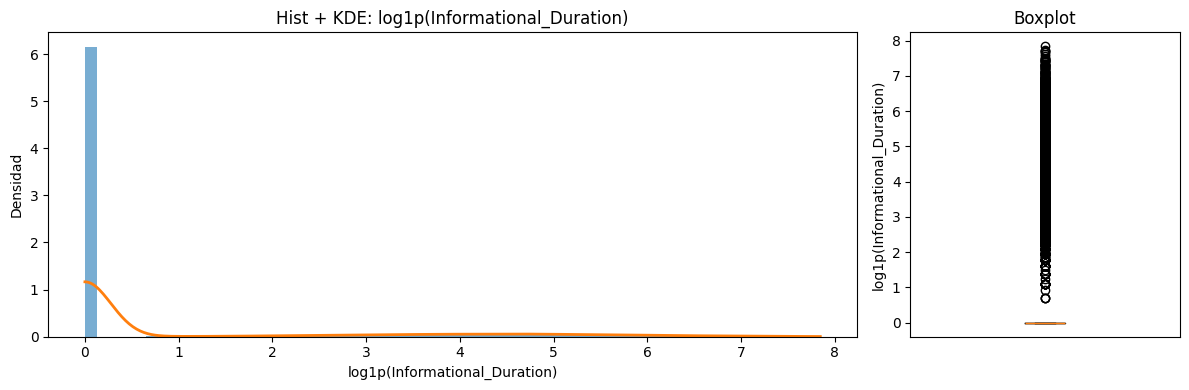

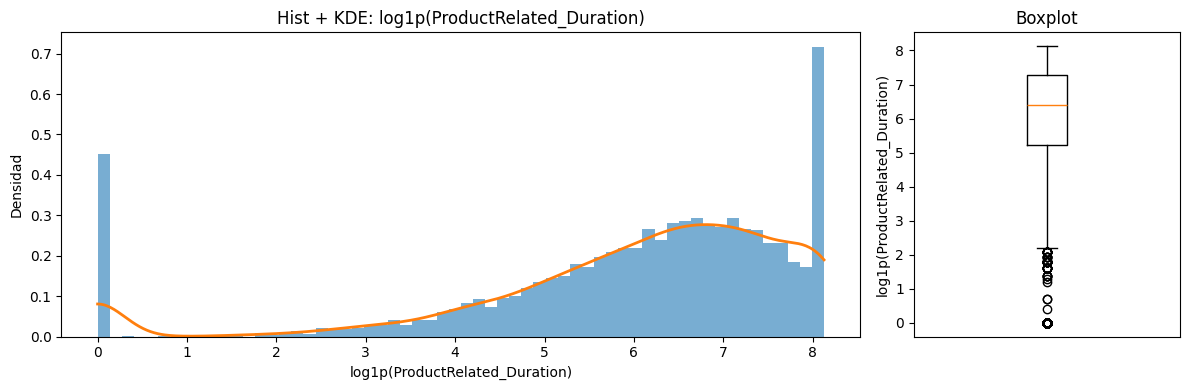

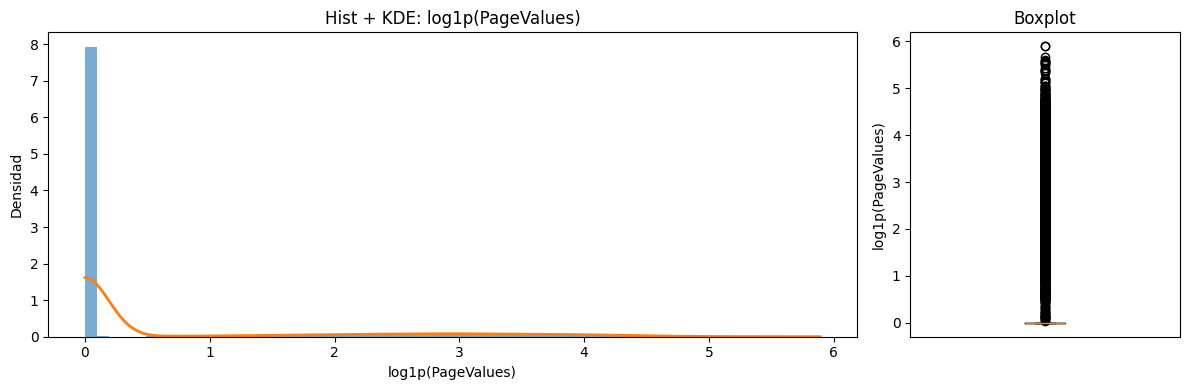

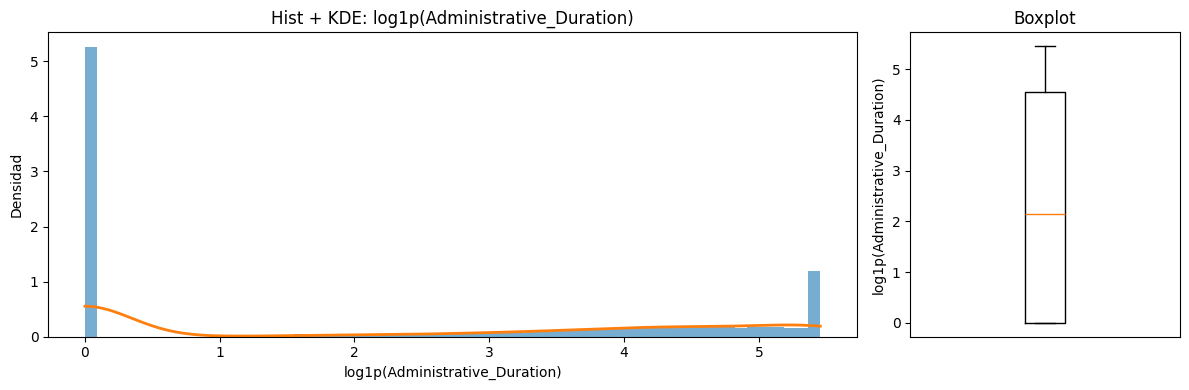

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_dist_and_box(df, col, *, bins=60, log1p=True, clip_q=None, kde_points=400):
    x = df[col].dropna().astype(float).to_numpy()
    if x.size == 0:
        return

    if clip_q is not None:
        lo, hi = np.quantile(x, clip_q)
        x = np.clip(x, lo, hi)

    x_plot = np.log1p(x) if log1p else x
    label = f"log1p({col})" if log1p else col

    fig, (ax, axb) = plt.subplots(
        1, 2, figsize=(12, 4),
        gridspec_kw={"width_ratios": [3, 1]}
    )

    # Histograma (densidad)
    ax.hist(x_plot, bins=bins, density=True, alpha=0.6)
    ax.set(title=f"Hist + KDE: {label}", xlabel=label, ylabel="Densidad")

    # KDE (si tiene sentido)
    if x_plot.size > 1:
        s = x_plot.std()
        if s > 0:
            xs = np.linspace(x_plot.min(), x_plot.max(), kde_points)
            kde = gaussian_kde(x_plot)
            ax.plot(xs, kde(xs), lw=2)

    # Boxplot
    axb.boxplot(x_plot, vert=True, showfliers=True)
    axb.set(title="Boxplot", ylabel=label)
    axb.set_xticks([])

    plt.tight_layout()
    plt.show()


cols = [
    "Informational_Duration",
    "ProductRelated_Duration",
    "PageValues",
    "Administrative_Duration",
]

for col in cols:
    plot_dist_and_box(df, col, bins=60, log1p=True)

A partir de las visualizaciones obtenidas, se confirma que varias variables numéricas presentan una fuerte asimetría positiva, caracterizada por una elevada concentración de valores cercanos a cero y colas largas hacia valores altos. La transformación log1p se emplea en esta fase exclusivamente con fines exploratorios, ya que permite visualizar con mayor claridad la estructura interna de las distribuciones, pero no resulta adecuada como transformación definitiva.

En el caso de Informational_Duration y PageValues, incluso tras aplicar log1p la mayor parte de la masa de probabilidad permanece concentrada en el valor cero. Esto indica que se trata de variables fuertemente zero-inflated, donde la asimetría no se debe únicamente a un problema de escala, sino a la propia naturaleza del comportamiento de los usuarios. Para este tipo de variables, una transformación basada en cuantiles, como QuantileTransformer, resulta potencialmente más apropiada.

Por otro lado, la variable ProductRelated_Duration muestra una clara mejora tras la transformación log1p, dando lugar a una distribución mucho más simétrica. Este comportamiento sugiere que una transformación de tipo Yeo–Johnson puede ser especialmente adecuada. La variable Administrative_Duration presenta un patrón intermedio: aunque la transformación logarítmica compacta la distribución, la simetría resultante es más moderada, por lo que también se considera candidata a una transformación Yeo–Johnson.

En todos los casos, se descarta el uso directo de log1p como transformación final debido a la alta proporción de ceros, optando por métodos más flexibles y robustos que puedan integrarse posteriormente en el pipeline de preprocesado.

### De Potencia

A continuación, se prueba la aplicación de la transformación de Yeo–Johnson sobre las variables ProductRelated_Duration y Administrative_Duration, seleccionadas en el análisis previo por presentar una fuerte asimetría positiva susceptible de ser corregida mediante este tipo de transformación. El objetivo es evaluar si esta modificación en la distribución de las variables se traduce en una mejora del rendimiento de los modelos, y determinar cuán significativa resulta dicha mejora en comparación con el preprocesado utilizado hasta el momento.

In [37]:
num_pipe_YJ = Pipeline([
    ("transform", PowerTransformer(method="yeo-johnson")),
    ("scaler", RobustScaler()),
])

num_cols_YJ = ['ProductRelated_Duration', 'Administrative_Duration']

num_pipe_rest = Pipeline([
    ("scaler", RobustScaler()),
])

num_cols_rest = [
    c for c in num_cols
    if c not in (num_cols_YJ)
]

preprocess = ColumnTransformer(
    transformers=[
        ("num_yj", num_pipe_YJ, num_cols_YJ),
        ("num_rest", num_pipe_rest, num_cols_rest),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

results_df = evaluate_all(preprocess, model_grids, X, y)
results_df


LR
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8183 ± 0.0024
  best params: {'model__C': 0.1, 'model__fit_intercept': True}

KNN
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8212 ± 0.0026
  best params: {'model__n_neighbors': 21, 'model__weights': 'uniform'}

DT
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  best balanced_accuracy: 0.8115 ± 0.0078
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10}

RF
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  best balanced_accuracy: 0.8419 ± 0.0079
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5}


,model,best_score_mean,best_score_std
0,LR,0.818346,0.002388
1,KNN,0.821158,0.002639
2,DT,0.811460,0.007809
3,RF,0.841903,0.007888


ras aplicar la transformación de Yeo–Johnson sobre las variables ProductRelated_Duration y Administrative_Duration, se observa una mejora clara y consistente en el rendimiento de los modelos, siendo especialmente notable en el caso de KNN. Este modelo pasa a una balanced accuracy de 0.8212 (antes 0.7455 ± 0.0096), lo que supone un incremento muy significativo y confirma la elevada sensibilidad de KNN a la forma de las distribuciones de las variables.

En el resto de modelos, los resultados también muestran una ligera mejora o, en su defecto, se mantienen estables. Este comportamiento indica que la transformación no introduce efectos adversos y resulta compatible con todos los enfoques evaluados.

En consecuencia, dado su impacto positivo global y su contribución decisiva a mejorar el rendimiento del modelo más desfavorable, se decide incorporar la transformación de Yeo–Johnson en el pipeline final de preprocesado, aplicada a las variables seleccionadas.

### Gaussiana

Dado el carácter fuertemente cero-inflado de las variables Informational_Duration y PageValues, y el hecho de que su asimetría no se corrige adecuadamente mediante transformaciones de tipo logarítmico, se explora a continuación el uso de una transformación gaussiana basada en cuantiles (QuantileTransformer con salida normal).

Este tipo de transformación permite mapear la distribución original de las variables a una distribución aproximadamente normal, siendo especialmente útil en casos donde existe una alta concentración de valores repetidos o extremos. El objetivo es evaluar si esta representación mejora el rendimiento de los modelos, manteniendo la coherencia con el pipeline de preprocesado definido hasta el momento.

In [38]:
num_pipe_Q = Pipeline([
    ("transform", QuantileTransformer(output_distribution="normal", n_quantiles=200, random_state=0)),
    ("scaler", RobustScaler()),
])

num_cols_Q = ['Informational_Duration', 'PageValues']

num_pipe_rest = Pipeline([
    ("scaler", RobustScaler()),
])

num_cols_rest = [
    c for c in num_cols_rest
    if c not in (num_cols_Q)
]

preprocess = ColumnTransformer(
    transformers=[
        ("num_q", num_pipe_Q, num_cols_Q),
        ("num_yj", num_pipe_YJ, num_cols_YJ),
        ("num_rest", num_pipe_rest, num_cols_rest),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)


results_df = evaluate_all(preprocess, model_grids, X, y)
results_df


LR
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8446 ± 0.0100
  best params: {'model__C': 0.1, 'model__fit_intercept': True}

KNN
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8400 ± 0.0088
  best params: {'model__n_neighbors': 21, 'model__weights': 'uniform'}

DT
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  best balanced_accuracy: 0.8108 ± 0.0081
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10}

RF
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  best balanced_accuracy: 0.8430 ± 0.0086
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5}


,model,best_score_mean,best_score_std
0,LR,0.844647,0.009981
1,KNN,0.840033,0.008804
2,DT,0.810814,0.008105
3,RF,0.843043,0.008648


Se observan mejoras notables tanto para LR (antes: 0.8183 ± 0.0024) como para KNN (antes: 0.8212 ± 0.0026). Sin embargo para los árboles la diferencia es mínima, bajando ligeramente en DT (antes: 0.8115 ± 0.0078) y mejorando algo en RF (antes: 0.8419 ± 0.0079). Por lo tanto parece razonable seguir con el mismo preproceso para todos los casos, facilitando el trabajo futuro.

La aplicación de una transformación gaussiana produce una mejora significativa en los modelos más sensibles a la distribución de las variables, en particular Regresión Logística y KNN. En el caso de la Regresión Logística, la balanced accuracy aumenta de a 0.8446 (antes 0.8183 ± 0.0024), mientras que KNN mejora hasta 0.8400 (antes 0.8212 ± 0.0026), consolidando así el impacto positivo de esta transformación.

En los modelos basados en árboles, el efecto es mucho más limitado, lo cual es coherente con su menor dependencia de la forma de las distribuciones. En concreto, Decision Tree experimenta una ligera disminución (antes 0.8115 ± 0.0078), mientras que Random Forest muestra una pequeña mejora (antes 0.8419 ± 0.0079). En cualquier caso, las variaciones son reducidas y no indican un impacto negativo relevante.

Dado que esta transformación mejora de forma clara el rendimiento dos modelos  y no perjudica de manera significativa al resto, se considera razonable mantener el mismo esquema de preprocesado para todos los modelos. Esta decisión permite simplificar el pipeline final, facilitar comparaciones futuras y garantizar un enfoque coherente a lo largo de todo el proceso de modelado.

## Análisis de características

En esta sección se aborda el análisis de la relevancia de las variables con el objetivo de comprender qué características contribuyen en mayor medida a la predicción de la variable objetivo y, en última instancia, evaluar posibles estrategias de selección de características. En primer lugar, se medirá la importancia de las variables utilizando distintos métodos, lo que permitirá obtener una visión comparativa desde enfoques complementarios.

Posteriormente, a partir de la información obtenida, se explorará la aplicación de técnicas de feature selection, analizando si la reducción del conjunto de variables puede simplificar el modelo y mejorar su rendimiento o capacidad de generalización sin una pérdida significativa de información.

### Importancia de variables

En esta subsección se analiza la importancia de las variables empleando enfoques complementarios. En primer lugar, se evalúa la relevancia de las características a partir de métodos propios de los modelos (como coeficientes o medidas de importancia internas), lo que permite identificar qué variables son más influyentes dentro de cada algoritmo.

Posteriormente, se utiliza Mutual Information como un método independiente del modelo, capaz de capturar relaciones no lineales entre las variables predictoras y la variable objetivo. La combinación de ambos enfoques proporciona una visión más completa y robusta sobre la contribución de cada característica al proceso de predicción, sirviendo como base para las etapas posteriores de selección de variables.

#### Por métodos

Dentro de los métodos basados en modelos, el análisis de importancia de variables se realiza únicamente para Regresión Logística y Árbol de Decisión. En el caso de la Regresión Logística, los coeficientes del modelo permiten una interpretación directa del peso y la dirección de la influencia de cada variable. Por su parte, el Árbol de Decisión proporciona medidas de importancia basadas en la reducción de impureza, ofreciendo una perspectiva complementaria y no lineal.

No se incluyen KNN ni Random Forest en este análisis inicial: KNN carece de un mecanismo interno que permita asignar importancias a las variables de forma directa, mientras que en Random Forest las importancias agregadas, aunque útiles, pueden resultar menos interpretables y redundantes en esta fase, dado que ya se dispone de un modelo lineal y uno no lineal simple que cubren ambos enfoques.

Logistic Regression

In [39]:
preprocess = ColumnTransformer(
    transformers=[
        ("num_q", num_pipe_Q, num_cols_Q),
        ("num_yj", num_pipe_YJ, num_cols_YJ),
        ("num_rest", num_pipe_rest, num_cols_rest),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

lr_final = LogisticRegression(
    max_iter=2000,
    C=0.1,
    fit_intercept=True,
    class_weight="balanced",
    random_state=rnd_st
)

pipe_lr = Pipeline([
    ("preprocess", preprocess),
    ("model", lr_final)
])

pipe_lr.fit(X, y)

feature_names = pipe_lr.named_steps["preprocess"].get_feature_names_out()

coefs = pipe_lr.named_steps["model"].coef_.ravel()
imp_lr = (
    pd.DataFrame({"feature": feature_names, "coef": coefs})
      .assign(abs_coef=lambda d: d["coef"].abs())
      .sort_values("abs_coef", ascending=False)
)

imp_lr.head(15)

,feature,coef,abs_coef
17,cat__Month_Nov,1.163354,1.163354
16,cat__Month_May,-0.790907,0.790907
67,cat__TrafficType_13,-0.672908,0.672908
15,cat__Month_Mar,-0.669188,0.669188
1,num_q__PageValues,0.587234,0.587234
12,cat__Month_Feb,-0.507733,0.507733
19,cat__Month_Sep,0.483324,0.483324
62,cat__TrafficType_8,0.476923,0.476923
59,cat__TrafficType_5,0.464927,0.464927
44,cat__Browser_12,0.430091,0.430091


En el caso de la Regresión Logística, la importancia de las variables se evalúa a partir de la magnitud absoluta de los coeficientes, dado que todas las características han sido previamente codificadas, transformadas y escaladas, lo que permite una comparación directa entre ellas.

Los resultados muestran que las variables categóricas asociadas a la estacionalidad (Month) y al canal de tráfico (TrafficType) tienen un impacto significativo en la probabilidad de conversión. En particular, el mes de noviembre presenta el coeficiente positivo de mayor magnitud, lo cual resulta coherente con la presencia de periodos promocionales y campañas comerciales en esa época del año. Otros meses como marzo, mayo o febrero también muestran efectos relevantes, tanto positivos como negativos, lo que sugiere una marcada componente temporal en el comportamiento de los usuarios.

Entre las variables numéricas, PageValues destaca como una de las más influyentes, reforzando su papel como un indicador clave del valor potencial de la sesión y de la intención de compra del usuario. Este resultado es consistente con el significado semántico de la variable y con su relevancia observada en fases anteriores del análisis.

Random Forest

In [40]:
preprocess = ColumnTransformer(
    transformers=[
        ("num_q", num_pipe_Q, num_cols_Q),
        ("num_yj", num_pipe_YJ, num_cols_YJ),
        ("num_rest", num_pipe_rest, num_cols_rest),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

rf_final = RandomForestClassifier(
    class_weight="balanced",
    n_estimators=200,
    random_state=rnd_st,
    max_depth=20,
    min_samples_leaf=5)

pipe_rf = Pipeline([
    ("preprocess", preprocess),
    ("model", rf_final)
])

pipe_rf.fit(X, y)

feature_names_rf = pipe_rf.named_steps["preprocess"].get_feature_names_out()
fi = pipe_rf.named_steps["model"].feature_importances_

imp_rf = (
    pd.DataFrame({"feature": feature_names_rf, "importance": fi})
      .sort_values("importance", ascending=False)
)

imp_rf.head(15)

,feature,importance
1,num_q__PageValues,0.430590
8,num_rest__ExitRates,0.087710
2,num_yj__ProductRelated_Duration,0.079399
6,num_rest__ProductRelated,0.058078
7,num_rest__BounceRates,0.049870
4,num_rest__Administrative,0.038207
3,num_yj__Administrative_Duration,0.037736
17,cat__Month_Nov,0.032348
0,num_q__Informational_Duration,0.014760
5,num_rest__Informational,0.012180


En el caso de Random Forest, la importancia de las variables revela un claro dominio de PageValues, que concentra una parte muy significativa de la capacidad predictiva del modelo. Este resultado refuerza su papel central como indicador directo de la intención de compra, ya observado en modelos anteriores.

A continuación, destacan variables relacionadas con el comportamiento de navegación del usuario, como la duración de la interacción con productos (ProductRelated_Duration), el número de páginas visitadas (ProductRelated) y las métricas de abandono (BounceRates y ExitRates). Estas características capturan de forma directa el nivel de interés y compromiso del usuario durante la sesión.

Las variables contextuales, como el mes de la visita (Month) o el tipo de visitante (VisitorType), presentan una importancia relativamente menor. Esto sugiere que su influencia es principalmente condicional, actuando en combinación con patrones de comportamiento más que como factores determinantes por sí solos.

En conjunto, los resultados obtenidos mediante Random Forest y Regresión Logística ofrecen una visión complementaria del problema: mientras que el modelo lineal destaca el peso de factores temporales y categóricos, el modelo basado en árboles enfatiza la relevancia del comportamiento observado durante la sesión, proporcionando una interpretación más rica y multidimensional de los determinantes de la conversión.

#### Por tipos

A continuación, se analiza la importancia de las variables mediante Mutual Information, diferenciando explícitamente entre variables numéricas y categóricas. Este enfoque permite cuantificar la dependencia estadística entre cada característica y la variable objetivo, sin asumir relaciones lineales ni depender de un modelo concreto.

Al separar el análisis por tipo de variable, se obtiene una visión más clara del peso relativo de la información numérica frente a la categórica, así como del papel que desempeña cada grupo en la predicción de la conversión. Este análisis servirá como complemento a los métodos basados en modelos y como base para la posterior etapa de selección de características.

Variables categóricas

In [41]:
from sklearn.feature_selection import mutual_info_classif

X_cat = pd.get_dummies(X[cat_cols], drop_first=False)

mi = mutual_info_classif(X_cat, y, discrete_features=True, random_state=42)

mi_cat = (
    pd.DataFrame({
        "feature": X_cat.columns,
        "mi": mi
    })
    .sort_values("mi", ascending=False)
)

mi_cat.head(15)

,feature,mi
4,TrafficType,0.015804
12,Month_Nov,0.010967
15,VisitorType_New_Visitor,0.004849
17,VisitorType_Returning_Visitor,0.004842
11,Month_May,0.003259
1,OperatingSystems,0.003215
10,Month_Mar,0.002241
7,Month_Feb,0.001696
2,Browser,0.001197
6,Month_Dec,0.000575


El análisis de Mutual Information aplicado a las variables categóricas muestra que TrafficType es la característica con mayor dependencia respecto a la variable objetivo, lo que refuerza su relevancia ya observada en los modelos basados en coeficientes. A continuación, destacan determinadas categorías del mes, especialmente noviembre, así como el tipo de visitante, tanto nuevo como recurrente, lo que confirma la influencia de factores temporales y de recurrencia en la probabilidad de conversión.

El resto de variables categóricas —como sistema operativo, navegador o región— presentan valores de información mutua sensiblemente inferiores, lo que sugiere un impacto más limitado y, en muchos casos, indirecto o condicionado por otras variables. En conjunto, estos resultados indican que, dentro del grupo de variables categóricas, la información más relevante para la predicción de la conversión se concentra en el canal de tráfico, la estacionalidad y el tipo de visitante.

Variables numéricas

In [42]:
num_cols = X.select_dtypes(include=np.number).columns

mi_num = mutual_info_classif(
    X[num_cols],
    y,
    discrete_features=False,
    random_state=42
)

mi_num_df = (
    pd.DataFrame({
        "feature": num_cols,
        "mi": mi_num
    })
    .sort_values("mi", ascending=False)
)

mi_num_df

,feature,mi
8,PageValues,0.164189
7,ExitRates,0.040197
5,ProductRelated_Duration,0.030215
4,ProductRelated,0.026561
6,BounceRates,0.023690
0,Administrative,0.016550
1,Administrative_Duration,0.014342
13,TrafficType,0.012402
2,Informational,0.009444
3,Informational_Duration,0.006936


El análisis de Mutual Information aplicado a las variables numéricas muestra de forma muy clara que PageValues es, con diferencia, la característica más informativa respecto a la variable objetivo, concentrando una cantidad de información muy superior al resto. Este resultado refuerza de manera consistente su papel central en la predicción de la conversión, tal y como se ha observado en todos los enfoques anteriores.

A continuación, destacan variables relacionadas con el comportamiento de navegación del usuario, como ExitRates, ProductRelated_Duration, ProductRelated y BounceRates, lo que confirma que la intensidad y calidad de la interacción con el sitio web son factores clave en la decisión de compra. Las variables administrativas también aportan información relevante, aunque en menor medida.

Por el contrario, variables como Informational_Duration, SpecialDay o aquellas relacionadas con el entorno técnico del usuario (navegador, sistema operativo o región) presentan valores de información mutua muy reducidos o nulos, lo que indica una capacidad predictiva limitada de forma individual.

En conjunto, estos resultados son coherentes con los obtenidos mediante modelos y subrayan que la información más relevante reside en métricas de comportamiento del usuario, mientras que las variables de contexto juegan un papel secundario.

### Selección de características

Antes de aplicar técnicas de selección de características, resulta conveniente recordar la dimensionalidad del problema. El conjunto de datos original cuenta con un número limitado de variables, pero tras aplicar el preprocesado completo —incluyendo la codificación One-Hot Encoding de las variables categóricas y las transformaciones definidas previamente— el número de columnas aumenta de forma significativa.

En esta sección se analiza cuántas características resultantes componen finalmente el espacio de entrada de los modelos y se evalúa si es posible reducir esta dimensionalidad sin perder información relevante, con el objetivo de simplificar los modelos, mejorar su interpretabilidad y, potencialmente, su capacidad de generalización.

In [43]:
print(X.columns)
print(len(X.columns))

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')
17


In [44]:
preprocess.fit(X, y)
preprocess.transform(X).shape[1]

75

Partiendo de las 17 variables originales del dataset y de las 75 características resultantes tras aplicar el preprocesado completo, se plantea en primer lugar una estrategia de selección manual de características, basada en los resultados obtenidos en el análisis de importancia de variables y de Mutual Information.

Con este objetivo, se definen tres conjuntos de variables de complejidad creciente. El conjunto A incluye las características que han mostrado de forma más consistente una alta relevancia predictiva, principalmente métricas de comportamiento del usuario y variables contextuales clave. El conjunto B amplía este grupo incorporando variables administrativas, que aportan información adicional sobre la interacción del usuario con el sitio. Finalmente, el conjunto C añade variables con menor relevancia individual, pero que podrían contribuir de manera complementaria en combinación con el resto.

Estos tres conjuntos se evaluarán de forma sistemática en cada uno de los modelos, con el fin de analizar el impacto de la reducción de dimensionalidad sobre el rendimiento y determinar si un subconjunto más compacto de características resulta suficiente o incluso preferible al conjunto completo.

In [45]:
set_A = [
     "PageValues",
     "ExitRates",
     "BounceRates",
     "ProductRelated_Duration",
     "ProductRelated",
     "Month",
     "TrafficType",
     "VisitorType",

]

set_B = set_A + [
    "Administrative_Duration",
    "Administrative",
]

set_C = set_B + [
    "Informational_Duration",
    "SpecialDay", "Weekend",
]

feature_sets = {
    "A_core": set_A,
    "B_core_plus_admin": set_B,
    "C_extended": set_C,
}

for name, model, grid, sampler in model_grids:
    print(f"--- {name} ---")

    for set_name, set_cols in feature_sets.items():
        print(f"--- {set_name} ---")

        num_cols_Q_set = [c for c in num_cols_Q if c in set_cols]
        num_cols_YJ_set = [c for c in num_cols_YJ if c in set_cols]
        num_cols_rest_set = [c for c in num_cols_rest if c in set_cols]
        cat_cols_set = [c for c in cat_cols if c in set_cols]

        preprocess_set = ColumnTransformer(
            transformers=[
                ("num_q", num_pipe_Q, num_cols_Q_set),
                ("num_yj", num_pipe_YJ, num_cols_YJ_set),
                ("num_rest", num_pipe_rest, num_cols_rest_set),
                ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_set),
            ]
        )

        pipe_set = Pipeline([
            ("preprocess", preprocess_set),
            ("sampler", sampler),
            ("model", model),
        ])

        X_set = X[set_cols]
        res = evaluate(pipe_set, X_set, y, param_grid=grid, verbose=1)
        print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
        print(f"  best params: {res['best_params']}\n")

--- LR ---
--- A_core ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8465 ± 0.0098
  best params: {'model__C': 0.1, 'model__fit_intercept': False}

--- B_core_plus_admin ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8467 ± 0.0092
  best params: {'model__C': 1, 'model__fit_intercept': False}

--- C_extended ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8469 ± 0.0085
  best params: {'model__C': 1, 'model__fit_intercept': False}

--- KNN ---
--- A_core ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8428 ± 0.0050
  best params: {'model__n_neighbors': 21, 'model__weights': 'uniform'}

--- B_core_plus_admin ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8406 ± 0.0089
  best params: {'model__n_neighbors': 21, 'model__weights': 'uniform'}

--- C_extended ---
Fitting 3 fo

Los resultados obtenidos con los tres conjuntos de características son muy satisfactorios, ya que, a pesar de la reducción significativa del número de variables, el rendimiento de los modelos no solo no se ve afectado negativamente, sino que en algunos casos incluso mejora, lo que implica una mayor eficiencia y simplicidad del modelo.

En el caso de los modelos basados en árboles, los mejores resultados se obtienen con el conjunto A, el más compacto de los tres. Tanto Decision Tree como Random Forest superan sus resultados previos utilizando únicamente este subconjunto de variables, lo que indica que las características incluidas capturan de forma suficiente la información relevante y que la incorporación de variables adicionales introduce ruido o redundancia.

Por el contrario, en los modelos Regresión Logística y KNN se observa una ligera mejora al ampliar el conjunto de variables. Ambos modelos alcanzan su mejor rendimiento con el conjunto C, que incluye variables adicionales sin llegar a utilizar la totalidad de las características disponibles tras el preprocesado. Este comportamiento sugiere que estos modelos se benefician de una mayor riqueza de información, aunque el impacto marginal de las nuevas variables es limitado.

En cualquier caso, es importante destacar que las diferencias entre los conjuntos A, B y C son moderadas, y que ninguno de ellos ofrece un rendimiento inferior al obtenido antes de aplicar selección de características. Esto permite concluir que ciertas variables excluidas en estos subconjuntos resultan poco informativas o incluso contraproducentes, y que una selección cuidadosa de características puede mejorar la eficiencia del modelo sin comprometer su capacidad predictiva.

Como alternativa a la selección manual, se evalúa a continuación una estrategia de selección automática de características mediante SelectKBest, aplicada sobre las 75 columnas resultantes tras el preprocesado. Este método permite seleccionar las k características más relevantes según un criterio estadístico, reduciendo la dimensionalidad de forma sistemática.

En concreto, se analizan distintos valores de k (10, 20, 40 y el conjunto completo) con el objetivo de estudiar el impacto del número de características seleccionadas en el rendimiento de los modelos y comparar estos resultados con los obtenidos en la selección manual.

In [46]:
param_grid_lr_skb = {
    "skb__k": [10, 20, 40, "all"],
    "model__C": [0.1, 1, 10],
    "model__fit_intercept": [True, False],
}

param_grid_knn_skb = {
    "skb__k": [10, 20, 40, "all"],
    "model__n_neighbors": [5, 11, 21],
    "model__weights": ["uniform", "distance"],
}

param_grid_dt_skb = {
    "skb__k": [10, 20, 40, "all"],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 10],
}

param_grid_rf_skb = {
    "skb__k": [10, 20, 40, "all"],
    "model__max_depth": [None, 20],
    "model__min_samples_leaf": [1, 5],
}

model_grids_skb = [
    ("LR", lr, param_grid_lr_skb, noop),
    ("KNN", knn, param_grid_knn_skb, ros),
    ("DT", dt, param_grid_dt_skb, noop),
    ("RF", rf, param_grid_rf_skb, noop),
]

rows = []

for name, model, grid, sampler in model_grids_skb:
    print(f"--- {name} ---")
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("sampler", sampler),
        ("skb", SelectKBest(score_func=f_classif)),
        ("model", model),
    ])

    res = evaluate(pipe, X, y, param_grid=grid, verbose=1)

    rows.append({
        "model": name,
        "best_score_mean": res["best_score_mean"],
        "best_score_std": res["best_score_std"],
    })

    print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
    print(f"  best params: {res['best_params']}")

results_df = pd.DataFrame(rows).sort_values("best_score_mean", ascending=False)
results_df


--- LR ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
  best balanced_accuracy: 0.8470 ± 0.0078
  best params: {'model__C': 1, 'model__fit_intercept': False, 'skb__k': 40}
--- KNN ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
  best balanced_accuracy: 0.8431 ± 0.0110
  best params: {'model__n_neighbors': 21, 'model__weights': 'distance', 'skb__k': 40}
--- DT ---
Fitting 3 folds for each of 32 candidates, totalling 96 fits
  best balanced_accuracy: 0.8108 ± 0.0081
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10, 'skb__k': 'all'}
--- RF ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits
  best balanced_accuracy: 0.8430 ± 0.0086
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5, 'skb__k': 'all'}


,model,best_score_mean,best_score_std
0,LR,0.846999,0.007806
1,KNN,0.843144,0.010980
3,RF,0.843043,0.008648
2,DT,0.810814,0.008105


Los resultados obtenidos mediante SelectKBest muestran que esta técnica resulta especialmente beneficiosa para la Regresión Logística, que alcanza su mejor rendimiento seleccionando 40 características, superando ligeramente los resultados obtenidos con la selección manual. Esto sugiere que, en modelos lineales, una selección automática basada en criterios estadísticos puede capturar combinaciones de variables relevantes que no siempre son evidentes en un análisis manual.

Sin embargo, para KNN, Decision Tree y Random Forest, los resultados no mejoran a los obtenidos utilizando los conjuntos seleccionados manualmente. Comparándolos con los casos antes de la selección de caracteísticas, no aportan mejoras significativas. En el caso de los modelos basados en árboles, esto es coherente con su capacidad para gestionar variables irrelevantes de forma interna, mientras que en KNN la pérdida de información puede afectar negativamente al cálculo de distancias.

En conjunto, estos resultados indican que la selección manual de características resulta más adecuada y consistente para la mayoría de los modelos, mientras que SelectKBest puede ser una alternativa interesante en contextos específicos, como el de la Regresión Logística.

## Resumen y Conclusiones